In [19]:
# # This is Stock Market Analysis Project

#Stock of tech companies:- Amazon, Apple, Microsoft, Google.
#Please send email to kay.pandya@gmail.com regarding any questions or suggestion regarding this project.
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [20]:
tech_list = ["AAPL","GOOG","MSFT","AMZN"]

In [21]:
end=datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [22]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [23]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,118.807211,119.889123,117.495777,118.683545,5.169763e+07,117.252838
std,9.874771,9.676349,10.089596,9.871758,2.082958e+07,9.317918
min,93.790001,94.519997,92.000000,93.419998,1.304640e+07,92.915814
25%,112.174999,113.410000,110.605000,112.460003,3.734320e+07,111.524858
50%,120.800003,121.809998,119.449997,120.529999,4.705430e+07,119.368538
75%,127.165001,127.934998,125.985000,126.915001,6.105805e+07,124.815072
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,130.671320


# What are the questions? what are we looking for?
Now that we have basic stuff done let's look at the question we will be answering:
1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

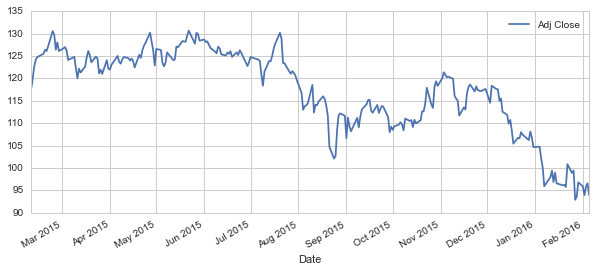

In [24]:
AAPL["Adj Close"].plot(legend=True,figsize=(10,4))

We can see that apple's stock has been decreasing quite significantly.
Now let's look in depth about Apple stock change by plotting the volume.
let's caculate the moving average for the Apple stock.

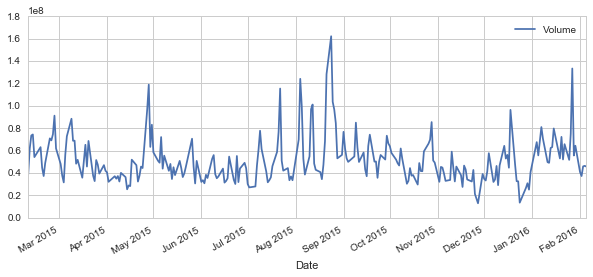

In [25]:
AAPL["Volume"].plot(legend=True,figsize=(10,4))

In [26]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

We have created for loop with column name "Moving averages for 10 days,20 days, and 50 days"
Now let's go ahead and plot all the moving averages.

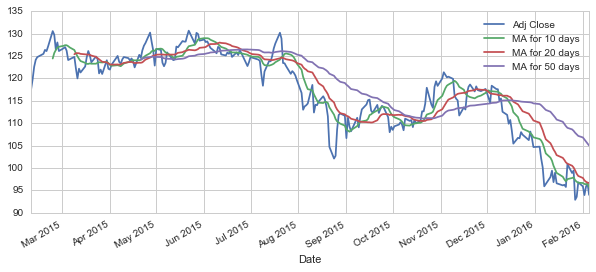

In [27]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

We are at end of question, so now let's move onto question 2.
This brings us to Section 2 of this project:-
#Daily Return Analysis

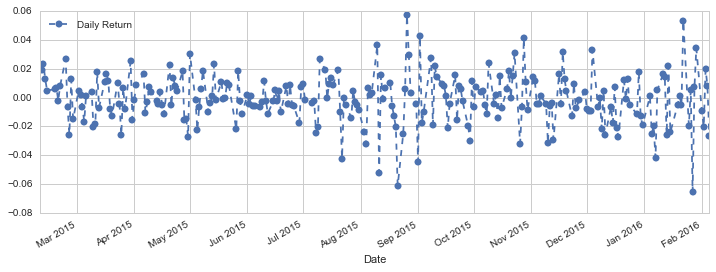

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# we use percent change method to find change in percentage of each day and plot it.
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

Now let's use seaborn to create a histogram to find average daily return and kde plot on the same figure.

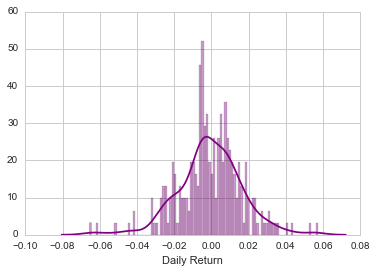

In [29]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Let's analyze the returns of all the stocks present in our list.

In [30]:
closing_df = DataReader(tech_list,"yahoo",start,end)["Adj Close"]

In [31]:
closing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2015-02-09 to 2016-02-05
Data columns (total 4 columns):
AAPL    251 non-null float64
AMZN    251 non-null float64
GOOG    251 non-null float64
MSFT    251 non-null float64
dtypes: float64(4)
memory usage: 9.8 KB


Great! Let's start analyzing.

In [32]:
tech_rets = closing_df.pct_change()

In [33]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-02-09,NaN,NaN,NaN,NaN
2015-02-10,0.019211,0.006585,0.017259,0.005666
2015-02-11,0.023439,0.005737,-0.001807,-0.005164
2015-02-12,0.012652,0.005411,0.012986,0.016753
2015-02-13,0.004903,0.012355,0.011198,0.018102


Let's Compare Google and Microsoft stocks to check relationship between stocks. 


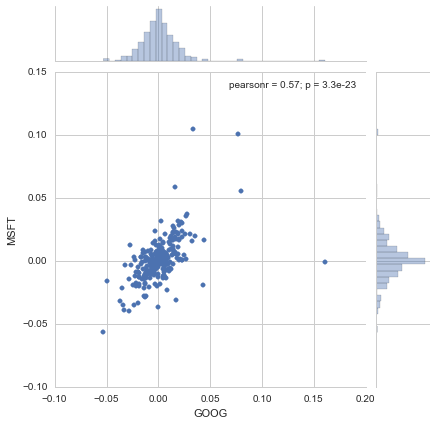

In [34]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Now let's use seaborn's pairplot method to look at every combinations of stock.

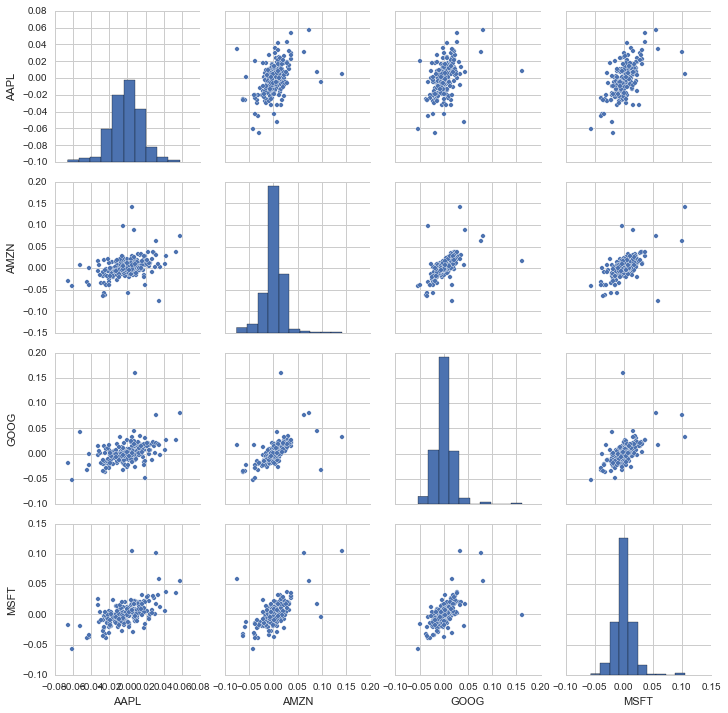

In [35]:
sns.pairplot(tech_rets.dropna())

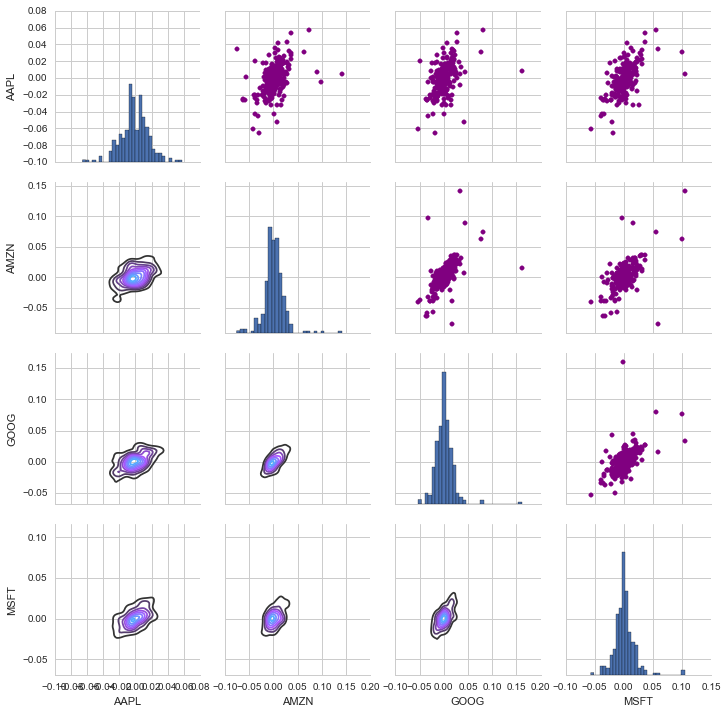

In [36]:
# I am going to use PairGrid from seaborn library.
returns_fig = sns.PairGrid(tech_rets.dropna())

# I am using mapper to specify upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

# Specifying the lower triangle and kde plot's color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# I defind the diagonal as a series of histogram plots of daily returns
returns_fig.map_diag(plt.hist,bins=30)

I am gonna use same technique to analyse closing price correlation between stocks.

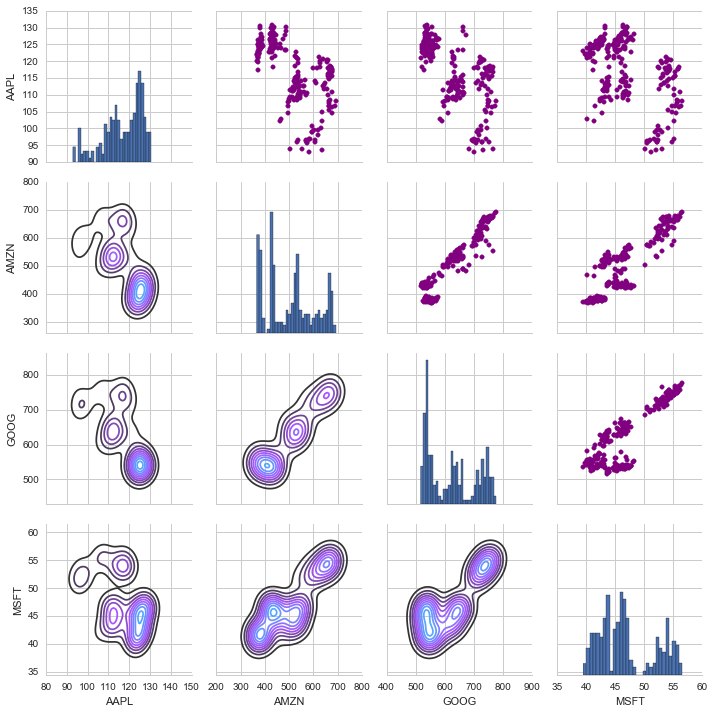

In [37]:
# I am going to use PairGrid from seaborn library.
#Everything is same except the DataFrame
#returns_fig = sns.PairGrid(tech_rets.dropna()) // commented so that differnece can be shows
returns_fig = sns.PairGrid(closing_df)

# I am using mapper to specify upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

# Specifying the lower triangle and kde plot's color
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# I defind the diagonal as a series of histogram plots of daily returns
returns_fig.map_diag(plt.hist,bins=30)

 We can see in intresting relationship between Google and Amazon. We can use heatmap to get numerican daily return values as well.

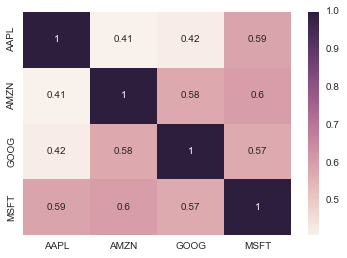

In [40]:
#Seaborn already has method to create heatmap
sns.heatmap(tech_rets.dropna().corr(),annot=True)

Nothing special in the heatmap/values. Now let's check heatmap and numerical values for closing price.

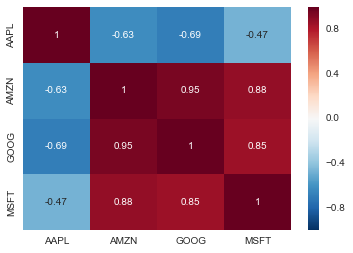

In [41]:
#same code as above
sns.heatmap(closing_df.dropna().corr(),annot=True)

We can see strong with all the companies except apple.

#Let's move onto Risk Analysis. 
Which brings us to our question 5:-How much value do we put at risk by investing in a particular stock?

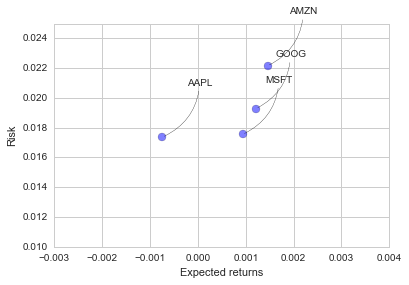

In [46]:

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))